In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import os

plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

pastel_colors = sns.color_palette("pastel")
husl_colors = sns.color_palette("husl")

# colors to use for the plots
orig_colors = pastel_colors + husl_colors
# line types to use for the plots
densely_dashdotted = (0, (3, 1, 1, 1))
long_dash_with_offset = (5, (10, 3))
line_styles = ['solid', 'dashed', 'dashdot', densely_dashdotted, long_dash_with_offset, 'dotted']
# markers to use for the plots
markers = ['o', 's', '*', '^', 'P', 'X', 'p', 'h', 'v', 'D']
hatches = ['o', '*', '\\\\', 'O', 'x', '\\', '--', 'o']
colors_set2 = sns.color_palette("colorblind")
marker_colors = [
    colors_set2[4],
    colors_set2[7],
    colors_set2[2],
    colors_set2[8],
]

base_plots_path = "plots/batching/"
# create the directory for the plots if it does not exist
os.makedirs(base_plots_path, exist_ok=True)


In [ ]:
# fixed length prefill requests throughput dataset (extracted from the logs)
fixedlen_prefill_thrgpt_yarn={
    'batch_size': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512],
    'throughput':{
        'prefill-8K': [13935.57, None, None, None, None, None, None, None, None, None],
        # 'prefill-7K': [14304.95, None, None, None, None, None, None, None, None, None],
        # 'prefill-6K': [13997.7, None, None, None, None, None, None, None, None, None],
        # 'prefill-5K': [14966.96, None, None, None, None, None, None, None, None, None],
        'prefill-4K': [14351.82, 15141.76, None, None, None, None, None, None, None, None],
        'prefill-2K': [12739.55, 14916.2, 15773.97, None, None, None, None, None, None, None],
        'prefill-1K': [11961.62, 13124.4, 15160.89, 16704.88, None, None, None, None, None, None],
        'prefill-512': [11041.5, 12110.5, 13244.66, 14209.12, 15836.93, None, None, None, None, None],
        'prefill-256': [9828.58, 11152.52, 12214.63, 14092.48, 15147.76, 16278.3, None, None, None, None],
        'prefill-128': [6942.67, 9866.68, 11214.3, 12200.89, 13296.13, 13993.38, 15535.55, None, None, None],
        'prefill-64': [4035.41, 6926.03, 9940.67, 11159.06, 12096.31, 13281.71, 15003.23, 15882.92, None, None],
        'prefill-32': [2028.87, 4037.96, 6944.29, 9725.74, 10911.17, 11934.15, 12997.62, 14742.34, 16153.56, None],
        'prefill-16': [1054.11, 2067.05, 3941.49, 6666.15, 9439.08, 10607.16, 11512.12, 12489.56, 14630.54, 14972],
    }
}

fixedlen_prefill_thrgpt_opt13B={
    'batch_size': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512],
    'throughput':{
        'prefill-2K': [7579.653943, None, None, None, None, None, None, None, None, None],
        'prefill-1K': [6849.722834, 7838.775375, None, None, None, None, None, None, None, None],
        'prefill-512': [5043.529998, 6936.438112, 8238.236277, None, None, None, None, None, None, None],
        'prefill-256': [5545.014252, 5164.778631, 7051.598557, 8488.017928, None, None, None, None, None, None],
        'prefill-128': [3932.604982, 5583.80174, 5231.167541, 6994.172434, 7850.605432, None, None, None, None, None],
        'prefill-64': [2196.459582, 3912.339151, 5606.657906, 6267.167387, 6954.036805, 8059.197323, None, None, None, None],
        'prefill-32': [1010.59227, 2190.685479, 3861.15527, 5507.105457, 5078.785654, 6892.137377, 7550.973681, None, None, None],
        # 'prefill-16': [1054.11, 2067.05, 3941.49, 6666.15, 9439.08, 10607.16, 11512.12, 12489.56, 14630.54, 14972],
    }
}

fixedlen_prefill_thrgpt_llama3_8B={
    'batch_size': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512],
    'throughput':{
        'prefill-16K': [12819.41541, None, None, None, None, None, None, None, None, None],
        'prefill-8K': [13947.64729, 14350.91329, None, None, None, None, None, None, None, None],
        'prefill-4K': [12842.53286, 14832.4541, 15604.57935, None, None, None, None, None, None, None],
        'prefill-2K': [12548.20459, 13819.5596, 15021.64771, 15682.3242, None, None, None, None, None, None],
        'prefill-1K': [11656.97529, 12766.71876, 13462.10857, 15386.42137, 15868.40075, None, None, None, None, None],
        'prefill-512': [10636.57403, 11814.48035, 12959.59744, 14661.57043, 15259.67621, 16461.10381, None, None, None, None],
        'prefill-256': [8734.220403, 10722.46818, 11867.66167, 12997.52171, 14116.95775, 14961.90941, 16202.78802, None, None, None],
        'prefill-128': [4687.322623, 8713.469799, 10790.89687, 11861.00844, 12978.35504, 13500.14716, 15499.99499, 15991.6684, None, None],
    } 
}

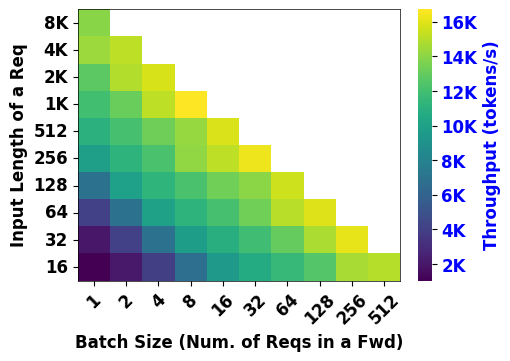

In [ ]:
def plot_fixed_len_prefill_heatmap(dataset, is_save):
    # convert the dataset to a pandas dataframe
    df = pd.DataFrame(dataset['throughput'], index=dataset['batch_size'])
    # Replace None with np.nan for heatmap compatibility
    df = df.replace({None: np.nan})

    fig, ax = plt.subplots(figsize=(5, 3.5), constrained_layout=True)

    # change the color map
    cmap_1 = sns.mpl_palette("viridis", as_cmap=True)
    # cmap_1 = sns.mpl_palette("Set2", n_colors=3, as_cmap=True)
    sns.heatmap(df.T, cmap=cmap_1, 
                # cbar_kws={'label': 'Throughput (tokens/s)'}, 
                yticklabels=[x.split('-')[1] for x in df.columns], ax=ax)
    

    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

    # Customize the outer border color and width
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(0.5)
    
    # Customize the color bar labels
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks([2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000])
    colorbar.set_ticklabels([f'{x/1000:.0f}K' for x in colorbar.get_ticks()], color='blue')
    colorbar.set_label('Throughput (tokens/s)', size=12, weight='bold', color='blue')

    ax.set_xlabel("Batch Size (Num. of Reqs in a Fwd)", fontweight='bold', fontsize=12)
    ax.set_ylabel("Input Length of a Req", fontweight='bold', fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    if is_save:
        plt.savefig(f"{base_plots_path}/prefill_throughput_fixedlen.eps", format='eps', bbox_inches='tight')
        plt.savefig(f"{base_plots_path}/prefill_throughput_fixedlen.png", format='png', bbox_inches='tight')
    plt.show()

plot_fixed_len_prefill_heatmap(fixedlen_prefill_thrgpt_yarn, True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


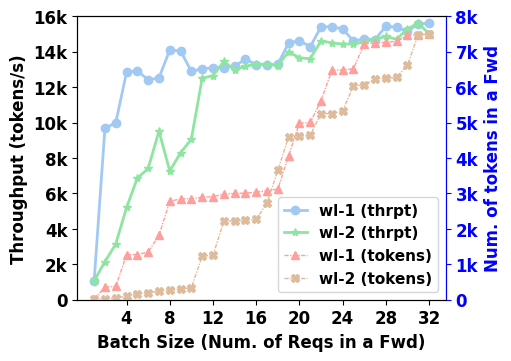

In [7]:
# variable length prefill requests throughput dataset
# These requests are selected from SharedGPT dataset based on the basic seed=1234 (data length range 4 < prefill < 2048, output=1)
# Then reshuffle the order of these requests to create different scenarios
# reshuffled seeds for order-1, order-2, and order-3 are 1234, 5678, and 9721 respectively. 

varlen_prefill_thrgpt={
    'batch_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
    'throughput': {
        'order-1': [1068.932804, 9687.360019, 9985.540937, 12855.2948, 12929.0807, 12413.40316, 12526.36403, 14097.03425, 14045.73485, 12893.70145, 13033.95365, 13091.38416, 13104.42395, 13180.28388, 13582.16828, 13276.37959, 13253.34281, 13293.16827, 14490.25444, 14628.29082, 14283.98492, 15398.25358, 15415.75985, 15291.94276, 14611.84634, 14722.081, 14686.66588, 15432.42976, 15387.77293, 15144.32112, 15585.83935, 15605.49378],
        'order-2': [1290.056246, 1813.224885, 5180.403274, 6701.673375, 9954.10835, 11766.6313, 11897.55431, 11960.31115, 13361.61904, 13362.98472, 13510.08674, 14315.33798, 14297.29083, 13982.83349, 14280.86852, 14154.45041, 14413.62743, 15012.27771, 14698.78848, 14251.09155, 13889.92019, 14446.25199, 14328.14992, 14780.58573, 15142.833, 15841.28337, 15874.85573, 15614.83574, 15298.84787, 15408.59072, 15321.874, 15742.29192],
        'order-3': [1071.014988, 2151.503838, 3143.408587, 5207.900496, 6863.982178, 7409.246582, 9519.150179, 7271.505339, 8294.325367, 9066.572246, 12499.06079, 12650.66947, 13450.56477, 12991.28596, 13172.20026, 13309.13206, 13288.67457, 13224.03686, 14006.80592, 13652.83229, 13611.25048, 14618.15296, 14496.55827, 14434.16058, 14432.36675, 14558.57787, 14700.94106, 14868.61654, 14706.96771, 15288.34465, 15622.82269, 15015.1865],
    },
   
    'num_tokens': {
        'order-1': [16, 359, 375, 1268, 1275, 1348, 1815, 2780, 2843, 2856, 2891, 2910, 2978, 3000, 3010, 3036, 3080, 3119, 4067, 4983, 5003, 5614, 6472, 6491, 6515, 7228, 7246, 7267, 7295, 7470, 7478, 7494],
        'order-2': [20, 28, 91, 164, 775, 1668, 1690, 1703, 2651, 2826, 2845, 3188, 3204, 3222, 3246, 3265, 3300, 3368, 4333, 5191, 5219, 5686, 5725, 5746, 5753, 6466, 7382, 7398, 7424, 7468, 7484, 7494],
        'order-3': [16, 34, 50, 94, 167, 188, 251, 264, 303, 338, 1231, 1250, 2215, 2223, 2245, 2265, 2732, 3648, 4596, 4615, 4639, 5250, 5257, 5325, 6038, 6064, 6239, 6249, 6277, 6620, 7478, 7494],
    }   
}

def plot_varlen_prefill_thrpt(dt, full_plot):
    fig, ax = plt.subplots(figsize=(5, 3.5), constrained_layout=True)
    xrange = np.arange(len(dt['batch_size']))
    if full_plot:
        xrange = np.arange(len(dt['batch_size']))
        # plots the throughput for different scenarios
        labels = ['wl-1', 'wl-3', 'wl-2']
        for idx, keys in enumerate(dt['throughput']):
            if idx == 1:
                # skip order-2, and make order-3 as the second plot
                continue
            ax.plot(xrange, dt['throughput'][keys], color=orig_colors[idx], marker=markers[idx], markersize=6, linestyle=line_styles[0], linewidth=2, label=f"{labels[idx]} (thrpt)")
        ax.set_xticks([x-1 for x in dt['batch_size'] if x % 4 == 0])
        # ax.set_xticklabels([str(x) for x in dt['batch_size'] if x % 4 == 0], rotation=45)
        ax.set_xticklabels([str(x) for x in dt['batch_size'] if x % 4 == 0], rotation=0)
        ax2 = ax.twinx()
        # plots the number of tokens for different scenarios
        for idx, keys in enumerate(dt['num_tokens']):
            if idx == 1:
                # skip order-2, and make order-3 as the second plot
                continue
            ax2.plot(xrange, dt['num_tokens'][keys], color=orig_colors[idx + 3], marker=markers[idx + 3], markersize=6, linestyle=line_styles[3], linewidth=1, label=f"{labels[idx]} (tokens)")

    else:
        # only plot the throughput when bs is even
        xrange_1 = np.arange(0, len(dt['batch_size']), 2)
        # plots the throughput for different scenarios
        labels = ['wl-1', 'wl-3', 'wl-2']
        width = 0.6
        offset = -0.5
        bar_gap = 0
        for idx, keys in enumerate(dt['throughput']):
            if idx == 1:
                # skip order-2, and make order-3 as the second plot
                continue
            # ax.bar(xrange, [dt['throughput'][keys][i] for i in xrange], color=orig_colors[idx], marker=markers[idx], markersize=6, linestyle=line_styles[0], linewidth=2, label=f"{labels[idx]} (thrpt)")
            ax.bar(xrange_1 + offset * width, [dt['throughput'][keys][i+1] for i in xrange_1], width + bar_gap, color=orig_colors[idx], hatch=hatches[idx], label=f"{labels[idx]} (thrpt)")
            offset += 1

        ax.set_xticks([x-2 for x in dt['batch_size'] if x % 4 == 0])
        # ax.set_xticklabels([str(x) for x in dt['batch_size'] if x % 4 == 0], rotation=45)
        ax.set_xticklabels([str(x) for x in dt['batch_size'] if x % 4 == 0], rotation=0)

        ax2 = ax.twinx()
        # plots the number of tokens for different scenarios
        for idx, keys in enumerate(dt['num_tokens']):
            if idx == 1:
                # skip order-2, and make order-3 as the second plot
                continue
            ax2.plot(xrange_1, [dt['num_tokens'][keys][i+1] for i in xrange_1], color=orig_colors[idx + 3], marker=markers[idx + 3], markersize=6, linestyle=line_styles[3], linewidth=2, label=f"{labels[idx]} (tokens)")

    # Define the formatter function
    def thousands_formatter(x, pos):
        if x < 1000:
            return '%d' % x
        else:
            return '%dk' % (x / 1000)

    ax.yaxis.set_major_formatter(plt.FuncFormatter(thousands_formatter))
    ax.set_ylim(0, 16000)
    ax.set_yticks(np.arange(0, 16001, 2000))
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(thousands_formatter))
    ax2.set_ylim(0, 8000)
    ax2.set_yticks(np.arange(0, 8001, 1000))

    ax.set_xlabel("Batch Size (Num. of Reqs in a Fwd)", fontweight='bold', fontsize=12)
    ax.set_ylabel("Throughput (tokens/s)", fontweight='bold', fontsize=12)
    ax2.set_ylabel("Num. of tokens in a Fwd", fontweight='bold', fontsize=12, color='blue')
    ax2.spines['right'].set_color('blue')
    ax2.tick_params(axis='y', color='blue', labelcolor='blue')

    # Combine legends from both ax and ax2
    lines_ax, labels_ax = ax.get_legend_handles_labels()  # Get handles and labels for ax
    lines_ax2, labels_ax2 = ax2.get_legend_handles_labels()  # Get handles and labels for ax2

    # Combine both
    ax.legend(lines_ax + lines_ax2, labels_ax + labels_ax2, loc="lower right", frameon=True, framealpha=0.8, fontsize=11, handlelength=1.5)
    # ax.legend(loc='lower right', )
    
    if full_plot:
        plt.savefig(f"{base_plots_path}/prefill_throughput_varlen.eps", format='eps', bbox_inches='tight')
        plt.savefig(f"{base_plots_path}/prefill_throughput_varlen.png", format='png', bbox_inches='tight')
    else:
        plt.savefig(f"{base_plots_path}/prefill_throughput_varlen_bars.eps", format='eps', bbox_inches='tight')
        plt.savefig(f"{base_plots_path}/prefill_throughput_varlen_bars.png", format='png', bbox_inches='tight')
    plt.show()

plot_varlen_prefill_thrpt(varlen_prefill_thrgpt, True)

In [8]:
# decode-only throughput
decode_thrgpt = {
    'batch_size': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512],
    'throughput': [72.32697579, 146.7976101, 290.6807744, 565.402991, 1078.334243, 1934.247668, 3422.258584, 5081.603405, 6182.693771, 7519.227634]
}

decode_thrgpt_models = {
    'batch_size': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512],
    'throughput': {
        'Yarn-llama2-7B': [72.32697579, 146.7976101, 290.6807744, 565.402991, 1078.334243, 1934.247668, 3422.258584, 5081.603405, 6182.693771, 7519.227634],
        'llama-3.1-8B': [65.71856681, 130.0779167, 256.7097511, 503.8195822, 962.4928565, 1640.983565, 2267.155995, 3627.973947, 5545.326546, 7091.825286],
        'OPT-13B': [39.07242073, 76.63628038, 151.8274329, 299.378789, 575.3264078, 978.9914552, 1971.627054, 3140.24121, 4133.06533, 4798.118238],
    }
    
}

0 Yarn-llama2-7B
1 llama-3.1-8B
2 OPT-13B


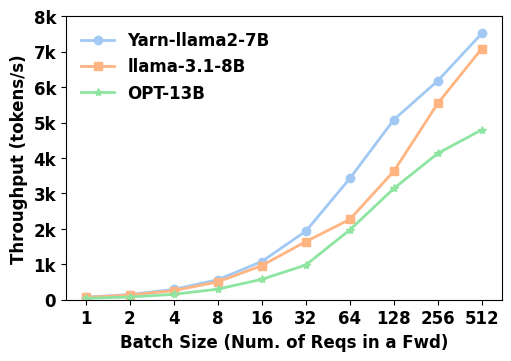

In [9]:
def plot_decode_thrpt(dt, is_single_model, is_save):
    fig, ax = plt.subplots(figsize=(5, 3.5), constrained_layout=True)
    
    xrange = np.arange(len(dt['batch_size']))
    if is_single_model:
        ax.plot(xrange, dt['throughput'], color=orig_colors[0], marker=markers[0], markersize=6, linestyle=line_styles[0], linewidth=2, label='decode-only reqs')
    else:
        for idx, keys in enumerate(dt['throughput']):
            print(idx, keys)
            ax.plot(xrange, dt['throughput'][keys], color=orig_colors[idx], marker=markers[idx], markersize=6, linestyle=line_styles[0], linewidth=2, label=f"{keys}")

    ax.set_xticks(np.arange(len(dt['batch_size'])), dt['batch_size'])
    # Define the formatter function
    def thousands_formatter(x, pos):
        if x < 1000:
            return '%d' % x
        else:
            return '%dk' % (x / 1000)

    ax.yaxis.set_major_formatter(plt.FuncFormatter(thousands_formatter))
    ax.set_ylim(0, 8000)

    ax.set_xlabel("Batch Size (Num. of Reqs in a Fwd)", fontweight='bold', fontsize=12)
    ax.set_ylabel("Throughput (tokens/s)", fontweight='bold', fontsize=12)
    ax.legend(loc='upper left', frameon=False, fontsize=12)

    if is_save:
        if is_single_model:
            plt.savefig(f"{base_plots_path}/decode_throughput.eps", format='eps', bbox_inches='tight')
            plt.savefig(f"{base_plots_path}/decode_throughput.png", format='png', bbox_inches='tight')
        else:
            plt.savefig(f"{base_plots_path}/decode_throughput_multi_models.eps", format='eps', bbox_inches='tight')
            plt.savefig(f"{base_plots_path}/decode_throughput_multi_models.png", format='png', bbox_inches='tight')
    plt.show()

plot_decode_thrpt(decode_thrgpt_models, False, True)



5.0


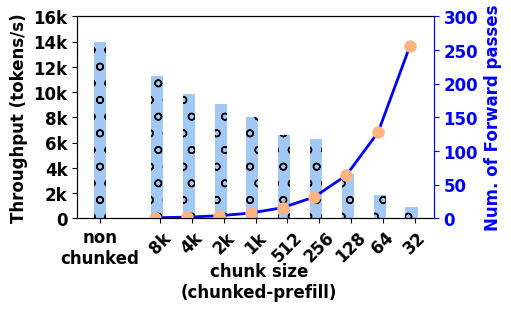

In [10]:
# chunked-prefill vs. non-chunked prefill for prefill only throughput (vllm_ipdps_919/tst_chunked_prefill_2/)
# prefill length = 8K, context-window = 8k, chunked-size = [128, 256, 512, 1024, 2048, 4096]

prefill_only_default_vs_chunked_data = {
    'chunked-size': ['non\nchunked', '8k', '4k', '2k', '1k', 512, 256, 128, 64, 32], 
    'throughput': {
        'prefill-8K': [13971.78, 11263.22, 9876.9, 9047.85, 8029.41, 6589.73, 6274.94, 3513.31, 1860.88, 941.62], 
        # # 'prefill-4K': [13610.54, 12321.47, 12087.64, 11479.67, 9798.02, 8527.86, 8120.96, 4823.46, 2663.88, 1351.41] 
    },
    'fwds':{
        'prefill-8K': [1, 1, 2, 4, 8, 16, 32, 64, 128, 256],
        # 'prefill-4K': [13610.54, 1351.41, 2663.88, 4823.46, 8120.96, 8527.86, 9798.02, 11479.67, 12087.64, 12321.47]  
    }
    
}

def plot_default_vs_chunkedprefill_thrpt(dt):
    fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)
    
    x_range = np.arange(len(dt['chunked-size']))

    width = 0.4
    offset = 0
    bar_gap = -0.02
    ax.bar(x_range[0], dt['throughput']['prefill-8K'][0], width + bar_gap, color=orig_colors[0], hatch='o', label='non-chunked')
    ax.bar(x_range[1:] + 2 * width, dt['throughput']['prefill-8K'][1:], width + bar_gap, color=orig_colors[0], hatch='o', label='chunked-prefill')

    ax2 = ax.twinx()
    for idx, key in enumerate(dt['fwds']):
        ax2.plot(x_range[1:] + 0.75, dt['fwds'][key][1:], color='blue', marker=markers[idx], markersize=8, markerfacecolor=orig_colors[1], markeredgecolor=orig_colors[1], linestyle=line_styles[idx], linewidth=2, label=f'{key}')

    ax.set_xticks([0] + list(np.arange(0, len(dt['chunked-size'][1:])) + 1.9)) 
    ax.set_xticklabels(dt['chunked-size'])
    for i, label in enumerate(ax.get_xticklabels()):
        if i > 0:  # Skip the first label
            label.set_rotation(45)  # Or any other angle

    # Define the formatter function
    def thousands_formatter(x, pos):
        if x < 1000:
            return '%d' % x
        else:
            return '%dk' % (x / 1000)

    ax.yaxis.set_major_formatter(plt.FuncFormatter(thousands_formatter))
    ax.set_ylim(0, 16000)
    ax.set_yticks(np.arange(0, 16001, 2000))
    ax2.set_ylim(0, 300)
    ax2.set_yticks(np.arange(0, 301, 50))
 
    # Custom X-axis labels
    def add_custom_labels(pos, label):
        print(pos)
        ax.text(pos, -5000, label, ha='center', va='center', fontsize=12)

    # # Adding custom labels below the x-axis
    add_custom_labels(np.mean(x_range[1:]), 'chunk size\n(chunked-prefill)')
    
    ax.set_ylabel("Throughput (tokens/s)", fontweight='bold', fontsize=12)
    ax2.set_ylabel("Num. of Forward passes", fontweight='bold', fontsize=12, color='blue')
    ax2.spines['right'].set_color('blue')
    ax2.tick_params(axis='y', color='blue', labelcolor='blue')
    # ax.legend(loc='upper center', frameon=False, fontsize=10)

    plt.savefig(f"{base_plots_path}/chunked_vs_nonchunked_thrpt(bs=1).eps", format='eps', bbox_inches='tight')
    plt.savefig(f"{base_plots_path}/chunked_vs_nonchunked_thrpt(bs=1).png", format='png', bbox_inches='tight')
    plt.show()

plot_default_vs_chunkedprefill_thrpt(prefill_only_default_vs_chunked_data)

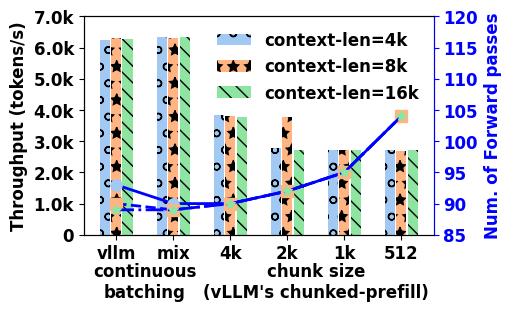

In [11]:
# TestCases: Same Model different context-length (non-chunked vs. chunked-prefill)
# workload_1: zipf: min=512, max=4k, requests = 10; 
# workload_2: zipf: min=512, max=2k, requests = 10;
# workload_3: zipf: min=128, max=2k, requests = 20;

same_model_diff_context = {
    'workload_1': {
        'chunked-size': ['vllm', 'mix', '4k', '2k', '1k', 512],
        'throughput': {
            'context-len=4k(TP=1)': [4038.77, 4021.52, 2962.86, 3815.61, 2856.16, 2752.07],
            'context-len=8k(TP=1)': [4046.06, 4041, 2950.07, 2903.4, 2851.68, 2749.4],
            'context-len=16k(TP=1)': [4091.31, 4080.88, 2976.15, 2925.33, 3716.33, 2761.63],
        },
        'fwds': {
            'context-len=4k(TP=1)': [184, 183, 182, 186, 193, 209],
            'context-len=8k(TP=1)': [181, 180, 182, 186, 193, 209],
            'context-len=16k(TP=1)': [180, 179, 182, 186, 193, 209],
        }
    },
    'workload_2': {
        'chunked-size': ['vllm', 'mix', '4k', '2k', '1k', 512],
        'throughput': {
            'context-len=4k(TP=1)': [5012.55, 4968.99, 2874.79, 2904.01, 2845.35, 2751.94],
            'context-len=8k(TP=1)': [5009.37, 5017.2, 2919.21, 2882.24, 4645.54, 2786.8],
            'context-len=16k(TP=1)': [5006.08, 5100.13, 2873.38, 2851.97, 2789.07, 2703.63],
        },
        'fwds': {
            'context-len=4k(TP=1)': [93, 93, 93, 95, 99, 108],
            'context-len=8k(TP=1)': [90, 92, 93, 95, 99, 108],
            'context-len=16k(TP=1)': [91, 91, 93, 95, 99, 108],
        } 
    },
    'workload_3': {
        'chunked-size': ['vllm', 'mix', '4k', '2k', '1k', 512],
        'throughput': {
            'context-len=4k': [6227.92, 6324.75, 3843.53, 2772.79, 2714.76, 2713.09],
            'context-len=8k': [6293.37, 6307.05, 3798.18, 3776.92, 2726.41, 2677.87],
            'context-len=16k': [ 6285.95, 6351.31, 3784.31, 2716.08, 2714.76, 2719.21],
        },
        'fwds': {
            'context-len=4k': [93, 90, 90, 92, 95, 104],
            'context-len=8k': [90, 89, 90, 92, 95, 104],
            'context-len=16k': [89, 89, 90, 92, 95, 104],
        } 
    },
}

same_model_diff_context_llama_3 = {
    'workload_3': {
        'chunked-size': ['vllm', 'mix', '4k', '2k', '1k', 512],
        'throughput': {
            'context-len=4k(TP=1)': [6060.9, 6161.75, 3768.72, 2747.12, 2717.59, 2697.01],
            'context-len=8k(TP=1)': [6133.95, 6207.02, 3786.11, 2749.04, 2706.86, 2716.77],
            'context-len=16k(TP=1)': [6198.38, 6208.06, 3747.47, 2743.64, 2698.15, 2686.92],
        },
        'fwds': {
            'context-len=4k(TP=1)': [93, 90, 90, 92, 95, 104],
            'context-len=8k(TP=1)': [90, 89, 90, 92, 95, 104],
            'context-len=16k(TP=1)': [89, 89, 90, 92, 95, 104],
        }
    }, 
}

def plot_model_different_context(dt, workload_name, is_save):
    fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)
    
    x_range = np.arange(len(dt['chunked-size']))

    width = 0.2
    offset = -1
    bar_gap = -0.02
    for idx, key in enumerate(dt['throughput']):
        ax.bar(x_range + offset * width, dt['throughput'][key], width + bar_gap, color=orig_colors[idx], hatch=hatches[idx], label=f'{key}')
        offset += 1

    ax2 = ax.twinx()
    for idx, key in enumerate(dt['fwds']):
        ax2.plot(x_range, dt['fwds'][key], color='blue', marker=markers[idx], markersize=8, markerfacecolor=orig_colors[idx], markeredgecolor=orig_colors[idx], linestyle=line_styles[idx], linewidth=2, label=f'{key}')
        if workload_name == 'wd_1':
            ax2.set_ylim(170, 220)
            ax2.set_yticks(np.arange(170, 221, 10))
        elif workload_name == 'wd_2' or workload_name == 'wd_3':
            ax2.set_ylim(85, 120)
            ax2.set_yticks(np.arange(85, 121, 5))

    ax.set_xticks([0] + [1] + list(np.arange(0, len(dt['chunked-size'][2:])) + 2)) 
    ax.set_xticklabels(dt['chunked-size'])
    # ax.set_xticklabels(['default'] + dt['chunked-size'][1:])
    # Define the formatter function
    def thousands_formatter(x, pos):
        if x < 1000:
            return '%d' % x
        else:
            return '%.1fk' % (x / 1000)

    ax.yaxis.set_major_formatter(plt.FuncFormatter(thousands_formatter))
    if workload_name == 'wd_3':
        ax.set_ylim(0, 7000)
        ax.set_yticks(np.arange(0, 7001, 1000))
    else:
        ax.set_ylim(0, 6000)
        ax.set_yticks(np.arange(0, 6001, 1000))
        
 
    # Custom X-axis labels
    def add_custom_labels(pos, label):
        if workload_name == 'wd_3':
            y_pos = -1500
        else:
            y_pos = -1000
        ax.text(pos, y_pos, label, ha='center', va='center', fontsize=12)

    # # # Adding custom labels below the x-axis
    add_custom_labels(np.mean(x_range[2:]), "chunk size\n(vLLM's chunked-prefill)")
    add_custom_labels(np.mean(x_range[0:2]), 'continuous\nbatching')
    
    ax.set_ylabel("Throughput (tokens/s)", fontweight='bold', fontsize=12)
    ax2.set_ylabel("Num. of Forward passes", fontweight='bold', fontsize=12, color='blue')
    ax2.spines['right'].set_color('blue')
    ax2.tick_params(axis='y', color='blue', labelcolor='blue')
    ax.legend(loc='upper right', frameon=False, fontsize=12)

    if is_save:
        plt.savefig(f"{base_plots_path}/same_model_diff_context_thrpt({workload_name}).eps", format='eps', bbox_inches='tight')
        plt.savefig(f"{base_plots_path}/same_model_diff_context_thrpt({workload_name}).png", format='png', bbox_inches='tight')
    plt.show()

plot_model_different_context(same_model_diff_context['workload_3'], 'wd_3', True)

3.0
0.5


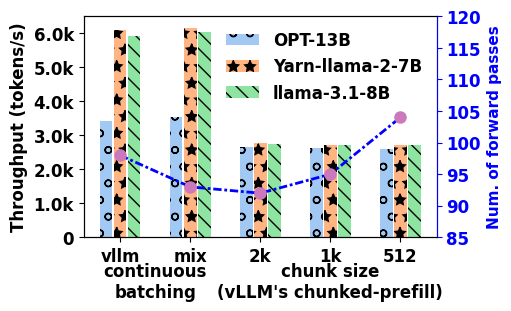

In [12]:
# TestCases: Same Model different context-length (non-chunked vs. chunked-prefill)
# workload_1: 10 requests using zipf distribution, min-tokens = 512, max-tokens = 2k
# workload_2: 20 requests using zipf distribution, min-tokens = 128, max-tokens = 2k

diff_model_data = {
    'workload_1': {
        'chunked-size': ['vllm', 'mix', '2k', '1k', 512],
        'throughput': {
            'OPT-13B': [2821, 2834.71, 2797.55, 2749.12, 2658.28],
            'Yarn-llama-2-7B': [4907.11, 4961.81, 2840.45, 2789.33, 2768.95],
            'llama-3.1-8B': [4767.83, 4759.13, 2826.83, 2789.37, 2717.52],
        },
        'fwds': {
            'OPT-13B': [96, 95, 95, 99, 108],
            'Yarn-llama-2-7B': [96, 95, 95, 99, 108],
            'llama-3.1-8B': [96, 95, 95, 99, 108],
        }
    },
    'workload_2': {
        'chunked-size': ['vllm', 'mix', '2k', '1k', 512],
        'throughput': {
            'OPT-13B': [3426.91, 3532.37, 2652.21, 2623.65, 2609.51],
            'Yarn-llama-2-7B': [6086.47, 6165.88, 2764.43, 2721.38, 2720.81],
            'llama-3.1-8B': [5910.26, 6041.12, 2745.4, 2714.64, 2705.95],
        },
        'fwds': {
            'OPT-13B': [98, 93, 92, 95, 104],
            'Yarn-llama-2-7B': [98, 93, 92, 95, 104],
            'llama-3.1-8B': [98, 93, 92, 95, 104],
        }
    }
}

def plot_diff_model_same_context(dt, workload_name, is_save):
    fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)
    
    x_range = np.arange(len(dt['chunked-size']))

    width = 0.2
    offset = -1
    bar_gap = -0.02
    for idx, key in enumerate(dt['throughput']):
        ax.bar(x_range + offset * width, dt['throughput'][key], width + bar_gap, color=orig_colors[idx], hatch=hatches[idx], label=f'{key}')
        offset += 1

    ax2 = ax.twinx()
    # only plot one, since all of them has same values
    ax2.plot(x_range, dt['fwds']['OPT-13B'], color='blue', marker='o', markerfacecolor=marker_colors[0], markeredgecolor=marker_colors[0], markersize=8, linestyle=line_styles[3], linewidth=2)

    ax2.set_ylabel("Num. of forward passes", fontweight='bold', fontsize=11, color='blue')
    def ax2_formatter(x, pos):
        return '%d' % x
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(ax2_formatter))

    ax.set_xticks([0] + [1] + list(np.arange(0, len(dt['chunked-size'][2:])) + 2)) 
    ax.set_xticklabels(dt['chunked-size'])
    # ax.set_xticklabels(['default'] + dt['chunked-size'][1:])
    # Define the formatter function
    
    def thousands_formatter(x, pos):
        if x < 1000:
            return '%d' % x
        else:
            return '%.1fk' % (x / 1000)

    ax.yaxis.set_major_formatter(plt.FuncFormatter(thousands_formatter))
    ax.set_ylim(0, 6500)
    ax.set_yticks(np.arange(0, 6501, 1000))
    ax2.set_ylim(85, 120)
    ax2.set_yticks(np.arange(85, 121, 5))
 
    # Custom X-axis labels
    def add_custom_labels(pos, label):
        print(pos)
        ax.text(pos, -1300, label, ha='center', va='center', fontsize=12)

    # # # Adding custom labels below the x-axis
    add_custom_labels(np.mean(x_range[2:]), "chunk size\n(vLLM's chunked-prefill)")
    # ax.text(1.5, -250, '|', ha='center', va='center', fontsize=20, color='lightgray', fontweight='light')
    add_custom_labels(np.mean(x_range[0:2]), 'continuous\nbatching')
    # ax.text(1.5, -250, '|', ha='center', va='center', fontsize=20, color='lightgray', fontweight='light') 
    ax.set_ylabel("Throughput (tokens/s)", fontweight='bold', fontsize=12)
    ax2.spines['right'].set_color('blue')
    ax2.tick_params(axis='y', color='blue', labelcolor='blue')
    ax.legend(loc='upper right', frameon=False, fontsize=12)

    if is_save:
        plt.savefig(f"{base_plots_path}/diff_models_same_context_len({workload_name}).eps", format='eps', bbox_inches='tight')
        plt.savefig(f"{base_plots_path}/diff_models_same_context_len({workload_name}).png", format='png', bbox_inches='tight')
    plt.show()

plot_diff_model_same_context(diff_model_data['workload_2'], 'wd_2', True)

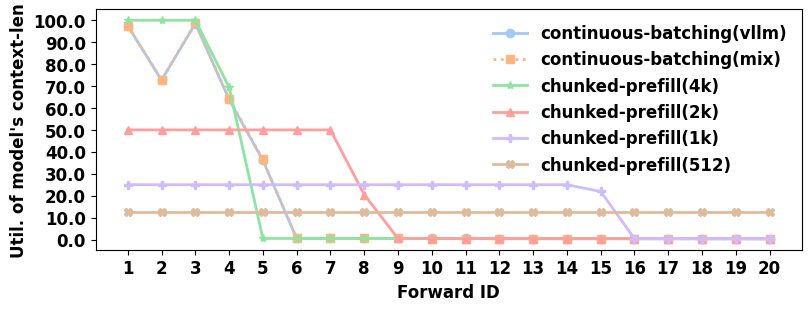

In [13]:
# plot the model's context-length utilization of each forwards
# Using the results from the same_model_diff_context (context-len=4K)
# For simplicity, only plots the first 20 steps.

context_len_utilization = {
    'fwds_id': np.arange(1, 21),
    'tokens_per_fwd': {
        'continuous-batching(vllm)': [3994, 2976, 4035, 2617, 1480, 20, 20, 20, 20, 20, 20, 19, 19, 18, 18, 16, 16, 16, 16, 15],
        'continuous-batching(mix)': [3994, 2983, 4044, 2631, 1499, 20, 20, 20, 20, 19, 18, 16, 16, 16, 16, 16, 16, 15, 14, 14],
        'chunked-prefill(4k)': [4096, 4096, 4096, 2846, 20, 20, 20, 20, 20, 19, 18, 16, 16, 16, 16, 16, 16, 15, 14, 14],
        'chunked-prefill(2k)': [2048, 2048, 2048, 2048, 2048, 2048, 2048, 841, 20, 19, 19, 19, 17, 16, 16, 16, 16, 16, 16, 15],
        'chunked-prefill(1k)': [1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 898, 17, 17, 17, 17, 16],
        'chunked-prefill(512)': [512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512],
    }
     
}

def plot_context_len_utilization(dt, context_len, is_save):
    fig, ax = plt.subplots(figsize=(8, 3), constrained_layout=True)
    
    x_range = np.arange(len(dt['fwds_id']))
    x_labels = dt['fwds_id']

    # convert the tokens_per_fwd to percentage
    for key in dt['tokens_per_fwd']:
        dt['tokens_per_fwd'][key] = np.array(dt['tokens_per_fwd'][key]) / context_len * 100

    
    for idx, key in enumerate(dt['tokens_per_fwd']):
        if key == 'continuous-batching(mix)':
            line_style_idx = 5
        else:
            line_style_idx = 0
        ax.plot(x_range, dt['tokens_per_fwd'][key], color=orig_colors[idx], marker=markers[idx], markersize=6, linestyle=line_styles[line_style_idx], linewidth=2, label=f"{key}")

    ax.set_ylabel("Util. of model's context-len", fontweight='bold', fontsize=12)
    def ax_formatter(x, pos):
        return '%.1f' % x
    ax.yaxis.set_major_formatter(plt.FuncFormatter(ax_formatter))
    ax.set_yticks(np.arange(0, 101, 10))

    ax.set_xticks(x_range) 
    ax.set_xticklabels(x_labels)
    ax.set_xlabel("Forward ID", fontweight='bold', fontsize=12)
    
    ax.legend(loc='upper right', frameon=False, fontsize=12)

    if is_save:
        plt.savefig(f"{base_plots_path}/llama-2-7B-context_util_20fwds.eps", format='eps', bbox_inches='tight')
        plt.savefig(f"{base_plots_path}/llama-2-7B-context_util_20fwds.png", format='png', bbox_inches='tight')
    plt.show()

plot_context_len_utilization(context_len_utilization, 4096, True)